In [1]:
#DSCC275_Project 1
#Xubin Lou
#31524742

In [2]:
# Problem 1
import pandas as pd 
p1_df=pd.read_csv('/Users/carol/Desktop/Problem1_DataSet.csv', names = ["Month", "Miles"], header=0) 
p1_df 

,Month,Miles
0,Jan-1964,7.269
1,Feb-1964,6.775
2,Mar-1964,7.819
3,Apr-1964,8.371
4,May-1964,9.069
...,...,...
79,Aug-1970,14.057
80,Sep-1970,16.234
81,Oct-1970,12.389
82,Nov-1970,11.594


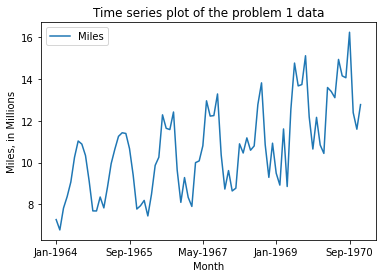

In [3]:
#1.
import numpy as np #import numpy
import matplotlib.pyplot as plt
p1_df.plot('Month', 'Miles')
plt.title('Time series plot of the problem 1 data')
plt.xlabel('Month')
plt.ylabel('Miles, in Millions')
plt.show()

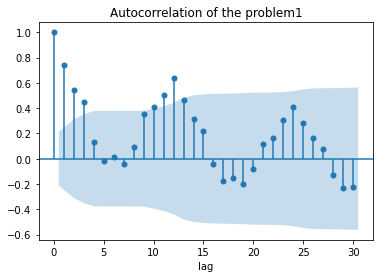

In [4]:
#2.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(p1_df.Miles, lags=30)
plt.title('Autocorrelation of the problem1')
plt.xlabel('lag')
plt.show()

In [5]:
#The seasonal period is 12.

In [6]:
#3.
def mov_avg(series, period):
    s=pd.Series(index=series.index, dtype=np.double)
    for i in range(period-1, len(series)): #create the loop situation
        s[i]=(series[i-period+1 : i+1]).mean()       
    return s

In [7]:
#since I want to remove the seasonality and mainly reveal the trend for moving average to determine. Thus, I use the seasonal period 12 as the suitable moving average window length.

In [8]:
per_12=mov_avg(p1_df.Miles, 12)

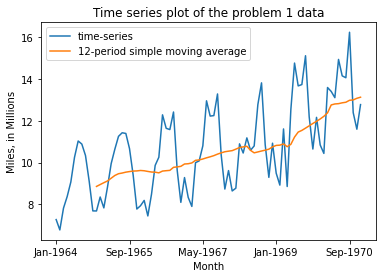

In [53]:
plt.figure()
plt.title('Time series plot of the problem 1 data')
plt.plot(p1_df['Month'], p1_df.Miles, label='time-series')
plt.plot(p1_df['Month'], per_12, label='12-period simple moving average')
plt.xticks(np.arange(0, len(p1_df)+1, 20))
plt.xlabel('Month')
plt.ylabel('Miles, in Millions')
plt.legend()
plt.show()

In [10]:
#4.
#The trend line in Q3 is increasing.

In [11]:
#5.
from statsmodels.tsa.statespace.tools import diff
diff_p1=diff(p1_df.Miles)
diff_p1

1    -0.494
2     1.044
3     0.552
4     0.698
5     1.179
      ...  
79   -0.090
80    2.177
81   -3.845
82   -0.795
83    1.178
Name: Miles, Length: 83, dtype: float64

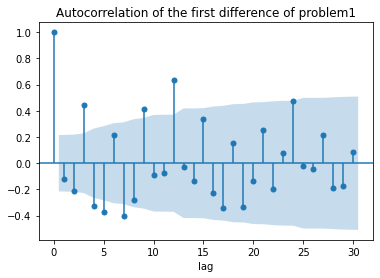

In [12]:
#ACF
plot_acf(diff_p1, lags=30)
plt.title('Autocorrelation of the first difference of problem1')
plt.xlabel('lag')
plt.show()

In [13]:
#The significant lags based on the ACF are 2,3,4,5,7,9,12,24.

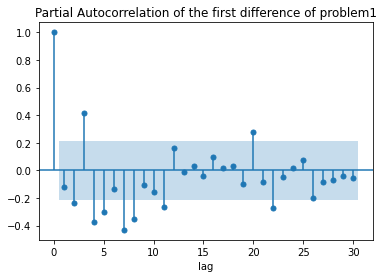

In [14]:
#PACF
plot_pacf(diff_p1, lags=30, method='ywmle')
plt.title('Partial Autocorrelation of the first difference of problem1')
plt.xlabel('lag')
plt.show()

In [15]:
#The significant lags based on the PACF are 2,3,4,5,7,8,11,20,22,26.

In [16]:
#6.
diff_12=diff_p1.diff(12).dropna()

In [17]:
diff_12

13   -0.027
14   -0.044
15    0.567
16   -0.008
17   -0.564
      ...  
79   -0.154
80    0.798
81   -0.920
82    0.745
83   -0.338
Name: Miles, Length: 71, dtype: float64

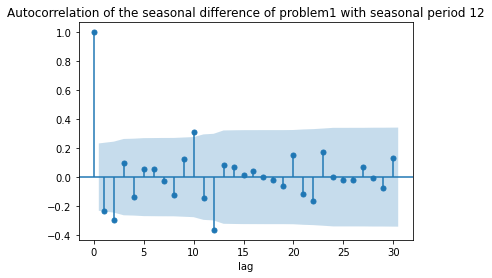

In [18]:
#ACF
plot_acf(diff_12, lags=30)
plt.title('Autocorrelation of the seasonal difference of problem1 with seasonal period 12')
plt.xlabel('lag')
plt.show()

In [19]:
#The significant lags based on the ACF are 1,2,10,12.

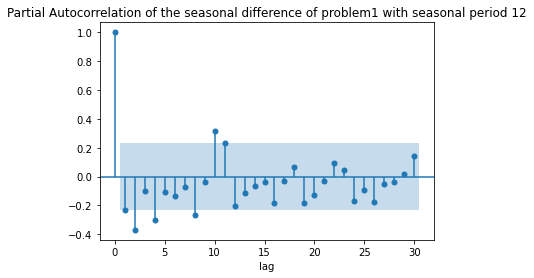

In [20]:
#PACF
plot_pacf(diff_12, lags=30, method='ywmle')
plt.title('Partial Autocorrelation of the seasonal difference of problem1 with seasonal period 12')
plt.xlabel('lag')
plt.show()

In [21]:
#The significant lags based on the PACF are 1,2,4,8,10,11.

In [22]:
#7
#a.
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

plist=[0,1,2,3]
dlist=[1]
qlist=[0,1,2,3]
Plist=[0,1,2,3]
Dlist=[1]
Qlist=[0,1,2,3]
pdqPDQ=[]
aic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            for P in Plist:
                for D in Dlist:
                    for Q in Qlist:
                        try: 
                            best_model=SARIMAX(p1_df.Miles.iloc[0:72], order=(p, d, q), seasonal_order=(P, D, Q, 12))
                            best_model_fit=best_model.fit(disp=False)
                            pdqPDQ.append([p,d,q,P,D,Q])
                            aic.append(best_model_fit.aic)
                        except:
                            continue

In [23]:
pdqPDQ

[[0, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 1, 2],
 [0, 1, 0, 0, 1, 3],
 [0, 1, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 1, 2],
 [0, 1, 0, 1, 1, 3],
 [0, 1, 0, 2, 1, 0],
 [0, 1, 0, 2, 1, 1],
 [0, 1, 0, 2, 1, 2],
 [0, 1, 0, 2, 1, 3],
 [0, 1, 0, 3, 1, 0],
 [0, 1, 0, 3, 1, 1],
 [0, 1, 0, 3, 1, 2],
 [0, 1, 0, 3, 1, 3],
 [0, 1, 1, 0, 1, 0],
 [0, 1, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 2],
 [0, 1, 1, 0, 1, 3],
 [0, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 2],
 [0, 1, 1, 1, 1, 3],
 [0, 1, 1, 2, 1, 0],
 [0, 1, 1, 2, 1, 1],
 [0, 1, 1, 2, 1, 2],
 [0, 1, 1, 2, 1, 3],
 [0, 1, 1, 3, 1, 0],
 [0, 1, 1, 3, 1, 1],
 [0, 1, 1, 3, 1, 2],
 [0, 1, 1, 3, 1, 3],
 [0, 1, 2, 0, 1, 0],
 [0, 1, 2, 0, 1, 1],
 [0, 1, 2, 0, 1, 2],
 [0, 1, 2, 0, 1, 3],
 [0, 1, 2, 1, 1, 0],
 [0, 1, 2, 1, 1, 1],
 [0, 1, 2, 1, 1, 2],
 [0, 1, 2, 1, 1, 3],
 [0, 1, 2, 2, 1, 0],
 [0, 1, 2, 2, 1, 1],
 [0, 1, 2, 2, 1, 2],
 [0, 1, 2, 2, 1, 3],
 [0, 1, 2, 3, 1, 0],
 [0, 1, 2, 3, 1, 1],
 [0, 1, 2, 3, 1, 2],
 [0, 1, 2, 3,

In [24]:
aic

[166.9021782589968,
 165.60830063857108,
 167.00001355397166,
 168.78602999431575,
 165.333069973129,
 167.32752280276435,
 168.91444844337053,
 170.53864550417475,
 167.3214795066057,
 168.88592115113318,
 170.53394994280225,
 172.53394839444195,
 168.57174035600508,
 170.5339490401586,
 172.53394802800528,
 174.5339478872025,
 160.29540588621,
 152.7186489465766,
 153.76926461944933,
 155.7674129519152,
 152.43566254517555,
 153.99829526473678,
 155.76833205410014,
 157.63149949335082,
 153.8282251250101,
 155.58470627695553,
 157.58346609621827,
 159.58346624466984,
 155.59733807118678,
 157.58346571202836,
 159.58346549992223,
 161.5834655191894,
 150.10535589100084,
 149.22497708383887,
 150.9133082201523,
 152.90421582973792,
 148.96865082638828,
 151.04387348366916,
 152.9097100451432,
 154.81678354274405,
 150.96434869041838,
 152.7958020423266,
 154.78614560840296,
 156.75879845410094,
 152.85249075534148,
 154.71096998005035,
 156.68981683081282,
 158.65965183852327,
 152.020

In [25]:
#Above, pdqPDQ is the model parameters for the non-seasonal (p,d,q) and seasonal components (P,D,Q), aic is the corresponding aic values to each model with different parameters in pdqPDQ.

In [26]:
#b.
min_aic=min(aic)
index_aic=aic.index(min_aic)
print('min aic is', min_aic)
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is', pdqPDQ[index_aic])

min aic is 147.28329750776624
The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is [2, 1, 3, 1, 1, 0]


In [27]:
#Accoridng to the evaluation criteria of AIC, we determine the best choice of parameters (p,d,q,P,D,Q) is (2, 1, 3, 1, 1, 0) with the minimum aic value 147.28329750776624.

In [28]:
#8.
best_model1=SARIMAX(p1_df.Miles[0:72], order=(2, 1, 3), seasonal_order=(1, 1, 0, 12)).fit(disp=False)
best_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Miles   No. Observations:                   72
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 12)   Log Likelihood                 -66.642
Date:                             Sun, 24 Oct 2021   AIC                            147.283
Time:                                     17:53:59   BIC                            161.826
Sample:                                          0   HQIC                           152.960
                                              - 72                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4506      0.157     -9.245      0.000      -1.758      -1.143
ar.L2         -0.5749      0.149     -3.857      0.000      -0.867      -0.283
ma.L1          1.0771      9.088      0.119      0.906     -16.734      18.888
ma.L2         -0.5938      1.850     -0.321      0.748      -4.220       3.032
ma.L3         -0.8334      8.004     -0.104      0.917     -16.520      14.853
ar.S.L12      -0.4312      0.161     -2.674      0.007      -0.747      -0.115
sigma2         0.5056      4.827      0.105      0.917      -8.954       9.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.23
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.30   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
p1_df['forcast']=best_model1.forecast(12)
p1_df['forcast'][72:]

72    10.935093
73    10.014858
74    12.995489
75    10.835676
76    13.520619
77    14.359980
78    13.914541
79    14.774622
80    15.999648
81    13.090608
82    11.502017
83    13.106317
Name: forcast, dtype: float64

<AxesSubplot:>

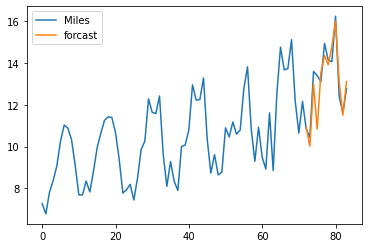

In [30]:
p1_df[['Miles','forcast']].plot()

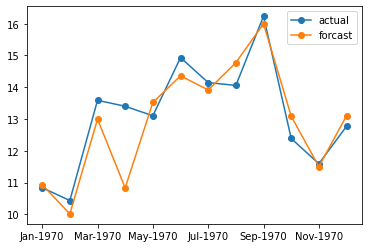

In [31]:
#the 7th year
plt.figure()
plt.plot(p1_df['Month'][72:], p1_df['Miles'][72:],'-o',label='actual')
plt.plot(p1_df['Month'][72:], p1_df['forcast'][72:],'-o',label='forcast')
plt.xticks(np.arange(0, len(p1_df['Month'][72:]), 2))
plt.legend()
plt.show()

In [32]:
#Comparing the forecast with actual values, it generally forcasts well, and quite better in Jan-1970, July-1970, Sep-1970, and Nov-1970. The point at April-1970 has the largest residual. 

In [33]:
#Problem 2

In [1]:
wine_df=pd.read_csv('/Users/carol/Desktop/TotalWine.csv', names = ["Time (Quarter)", "TotalWine"], header=0) 
wine_df 

NameError: name 'pd' is not defined

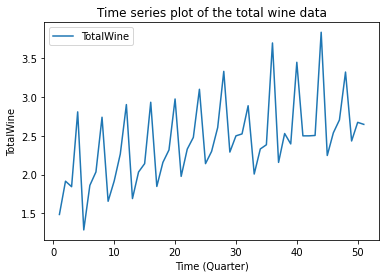

In [35]:
#a)
wine_df.plot('Time (Quarter)', 'TotalWine')
plt.title('Time series plot of the total wine data')
plt.xlabel('Time (Quarter)')
plt.ylabel('TotalWine')
plt.show()

In [36]:
#According to the time series, the seasonal period for this time-series is about 4 time(quarter). 

In [37]:
#b)
diff_lag1=wine_df.TotalWine.diff(1).dropna()
diff_lag2=wine_df.TotalWine.diff(2).dropna()
diff_lag4=wine_df.TotalWine.diff(4).dropna()
diff_lag6=wine_df.TotalWine.diff(6).dropna()

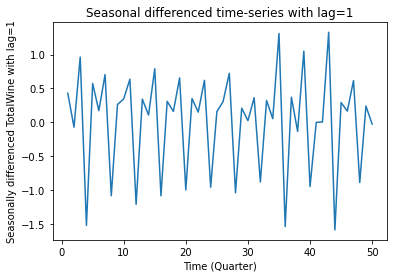

In [38]:
plt.figure()
plt.title('Seasonal differenced time-series with lag=1')
plt.plot(diff_lag1, label='seasonal difference with lag=1')
plt.xlabel('Time (Quarter)')
plt.ylabel('Seasonally differenced TotalWine with lag=1')
plt.show()

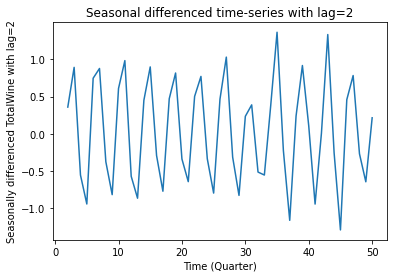

In [39]:
plt.figure()
plt.title('Seasonal differenced time-series with lag=2')
plt.plot(diff_lag2, label='seasonal difference with lag=2')
plt.xlabel('Time (Quarter)')
plt.ylabel('Seasonally differenced TotalWine with lag=2')
plt.show()

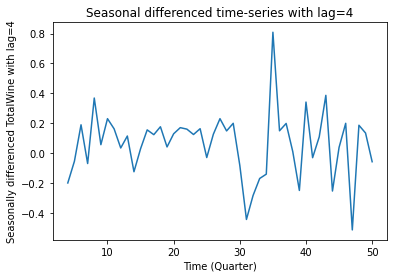

In [40]:
plt.figure()
plt.title('Seasonal differenced time-series with lag=4')
plt.plot(diff_lag4, label='seasonal difference with lag=4')
plt.xlabel('Time (Quarter)')
plt.ylabel('Seasonally differenced TotalWine with lag=4')
plt.show()

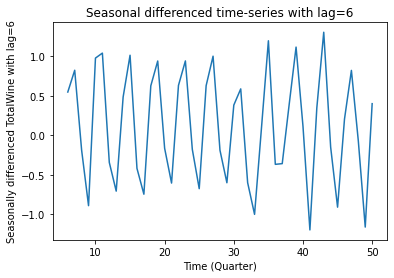

In [41]:
plt.figure()
plt.title('Seasonal differenced time-series with lag=6')
plt.plot(diff_lag6, label='seasonal difference with lag=6')
plt.xlabel('Time (Quarter)')
plt.ylabel('Seasonally differenced TotalWine with lag=6')
plt.show()

In [42]:
#According to the plots, seasonal difference with lag=4 is most suitable to remove the seasonality.

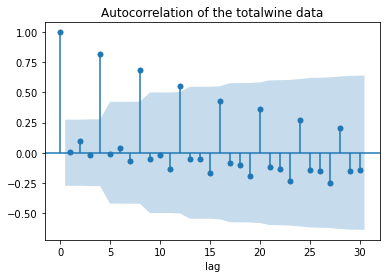

In [43]:
#c)
#ACF
plot_acf(wine_df['TotalWine'], lags=30)
plt.title('Autocorrelation of the totalwine data')
plt.xlabel('lag')
plt.show()

In [44]:
#According to the ACF, the seasonal period is 4.

In [45]:
#d)
import statsmodels.api as sm
from statsmodels.api import tsa
model_ar=tsa.AR(diff_lag4)
best_order=model_ar.select_order(maxlag=10, ic="aic")
print(best_order)

5


In [46]:
#The best order is 5.

In [47]:
#e)
#i.
ar_fit=model_ar.fit(maxlag=5)

In [48]:
#ii.
ar_predict=ar_fit.predict(start=5)
ar_predict

9     0.146767
10   -0.022745
11    0.217014
12   -0.137244
13    0.136466
14   -0.031216
15    0.015855
16    0.101845
17    0.034164
18    0.220330
19    0.088757
20    0.013343
21    0.059525
22    0.019182
23    0.125038
24    0.042572
25    0.029357
26    0.023892
27    0.055598
28    0.030224
29    0.173065
30    0.043595
31   -0.033025
32   -0.004962
33   -0.066892
34    0.133620
35    0.354536
36    0.287667
37    0.213152
38    0.234916
39   -0.460851
40    0.103791
41    0.006413
42    0.119578
43    0.296816
44   -0.134191
45    0.168129
46    0.031130
47   -0.143235
48    0.291566
49    0.038977
50   -0.038520
dtype: float64

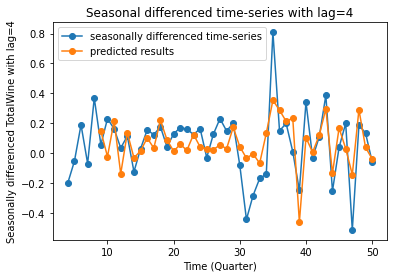

In [49]:
#iii.
plt.figure()
plt.title('Seasonal differenced time-series with lag=4')
plt.plot(diff_lag4,'-o',label='seasonally differenced time-series')
plt.plot(ar_predict,'-o',label='predicted results')
plt.xlabel('Time (Quarter)')
plt.ylabel('Seasonally differenced TotalWine with lag=4')
plt.legend()
plt.show()

In [50]:
#iv.
from sklearn.metrics import mean_absolute_error as mae
mae(diff_lag4[5:], ar_predict)

0.13139640993766555

In [51]:
#The Mean Absolute Error is 0.13139640993766555.